In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [7]:
housing = pd.read_csv('Datasets/housing.csv',
                      names=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])
housing = housing[['CRIM','RM','LSTAT','MEDV']]
housing = housing.dropna(axis=0, how='any')
housing

,CRIM,RM,LSTAT,MEDV
0,0.00632,6.575,4.98,24.0
1,0.02731,6.421,9.14,21.6
2,0.02729,7.185,4.03,34.7
3,0.03237,6.998,2.94,33.4
4,0.06905,7.147,5.33,36.2
...,...,...,...,...
501,0.06263,6.593,9.67,22.4
502,0.04527,6.120,9.08,20.6
503,0.06076,6.976,5.64,23.9
504,0.10959,6.794,6.48,22.0


In [8]:
def linear_regression(df):
    x = df.loc[:, ['CRIM','RM','LSTAT']]
    y = df.loc[:, 'MEDV']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=48)#选择20%为测试集
    print('X_train.shape={}, y_train.shape ={}, X_test.shape={}, y_test.shape={}'.format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

    linreg = LinearRegression()
    model = linreg.fit(x_train, y_train)
    print("Model's parameters: ", model)
    print("Model's intercept: ", linreg.intercept_)
    print("Weight of parameters: ", linreg.coef_)

    y_pred = linreg.predict(x_test)
    sum_mean = 0
    for i in range(len(y_pred)):
        sum_mean += (y_pred[i] - y_test.values[i]) ** 2
    sum_err = np.sqrt(sum_mean/len(y_pred))
    print("RMSE by hand: ", sum_err)
    print("MSE by sklearn: ", mean_squared_error(y_test, y_pred))
    print("R2 by sklearn: ", r2_score(y_test,y_pred))

    # ROC curve
    plt.figure(figsize=(15,5))
    plt.plot(range(len(y_pred)), y_pred, label="predict")
    plt.plot(range(len(y_pred)), y_test, label="test")
    plt.legend()
    plt.ylabel('MEDV', rotation='horizontal', labelpad=20)
    plt.show()


X_train.shape=(404, 3), y_train.shape =(404,), X_test.shape=(102, 3), y_test.shape=(102,)
Model's parameters:  LinearRegression()
Model's intercept:  -2.8230465624743957
Weight of parameters:  [-0.11971099  5.21002066 -0.56428552]
RMSE by hand:  6.321950644034003
MSE by sklearn:  39.96705994560194
R2 by sklearn:  0.5868162136929052


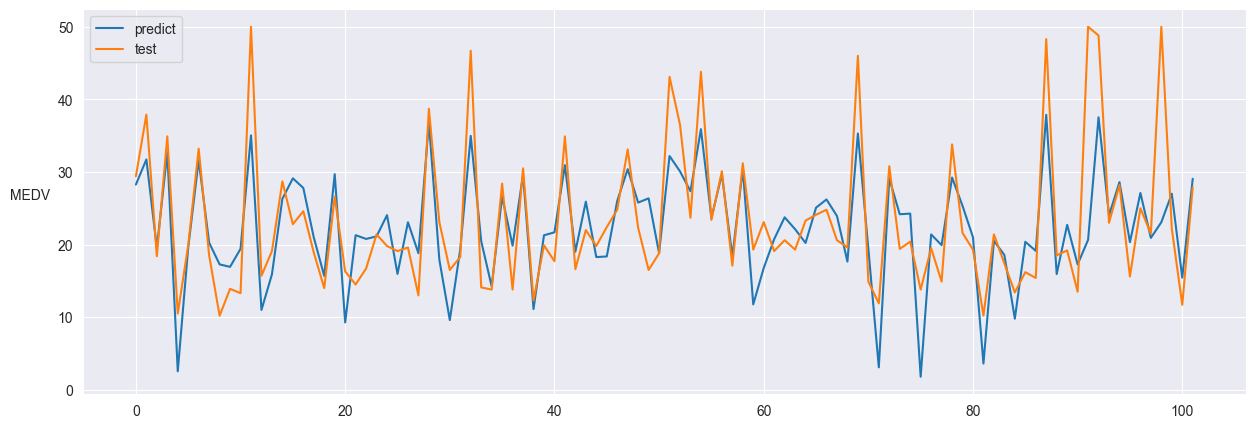

In [9]:
linear_regression(housing)